In [2]:
# importing the basics libries
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the datasets
data = pd.read_csv('/content/drive/MyDrive/Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# descriptive analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
print("the shape of the dataset", data.shape)
print("the  null values of the dataset" , data.isnull().sum().sum())

the shape of the dataset (14640, 15)
the  null values of the dataset 61962


In [9]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [10]:
#checking the target values
data.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

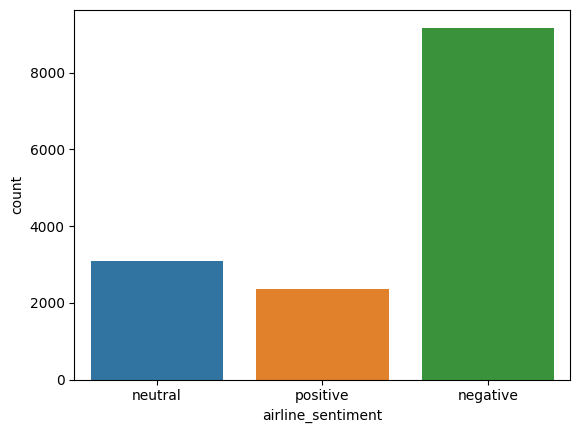

In [12]:
ax = sns.countplot(x="airline_sentiment", data=data)

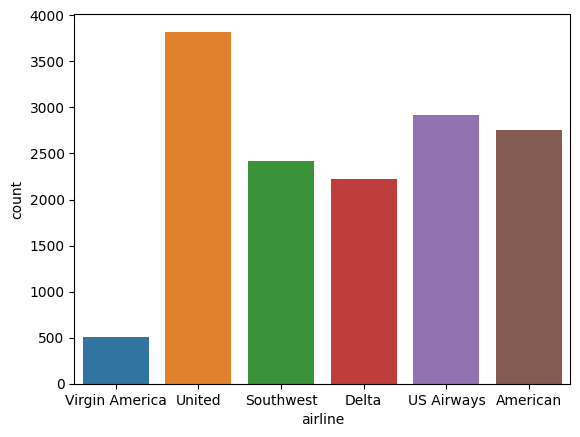

In [13]:
ax1 = sns.countplot(x=data['airline'])

In [15]:
import re, nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
## basic functions for  cleaning the text and prediction the
## this is to check the tweet cleaning the data and removing the user first name
import re

def clean_tweet_text(text):
  # tokens = nltk.word_tokenize(re.sub('[^a-zA-Z]'," ",text))
  # tokens = [token.lower() for token in tokens]
  # return  ' '.join(tokens[2:])
  tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))
  tokens = [token.lower() for token in tokens]
  return ' '.join(tokens[2:])

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
## removing and confirming the punchuvations are in the text or not
import string
def process_msg(msg):
  nopunc = [chars for chars in msg if chars not in string.punctuation]
  nopunc = ''.join(nopunc)
  return  ' '.join([word for word  in nopunc.split() if word.lower() not in stopwords.words('english')])


# def text_process(msg):
#   nopunc =[char for char in msg if char not in string.punctuation]
#   nopunc=''.join(nopunc)
#   return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])




In [19]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score

In [20]:
## genreating the genral function for the model so we can try many model
def check_scores(clf,X_train, X_test, y_train, y_test):

  model=clf.fit(X_train, y_train)
  predicted_class=model.predict(X_test)
  predicted_class_train=model.predict(X_train)
  test_probs = model.predict_proba(X_test)
  test_probs = test_probs[:, 1]
  yhat = model.predict(X_test)
  lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
  lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)


  print('Train confusion matrix is: ',)
  print(confusion_matrix(y_train, predicted_class_train))

  print()
  print('Test confusion matrix is: ')
  print(confusion_matrix(y_test, predicted_class))
  print()
  print(classification_report(y_test,predicted_class))
  print()
  train_accuracy = accuracy_score(y_train,predicted_class_train)
  test_accuracy = accuracy_score(y_test,predicted_class)

  print("Train accuracy score: ", train_accuracy)
  print("Test accuracy score: ",test_accuracy )
  print()
  train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
  test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

  print("Train ROC-AUC score: ", train_auc)
  print("Test ROC-AUC score: ", test_auc)
  fig, (ax1, ax2) = plt.subplots(1, 2)

  ax1.plot(lr_recall, lr_precision)
  ax1.set(xlabel="Recall", ylabel="Precision")

  plt.subplots_adjust(left=0.5,
                    bottom=0.1,
                    right=1.5,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
  print()
  print('Are under Precision-Recall curve:', lr_f1)

  fpr, tpr, _ = roc_curve(y_test, test_probs)


  ax2.plot(fpr, tpr)
  ax2.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

  print("Area under ROC-AUC:", lr_auc)
  return train_accuracy, test_accuracy, train_auc, test_auc


In [21]:
## hyper parameter tunnnig using the grid searchCV method

def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model

<h1> Text Perpretaation

In [33]:
datanoneu = data[data['airline_sentiment'] !='neutral']

In [34]:
datanoneu.airline_sentiment.unique()

array(['positive', 'negative'], dtype=object)

In [35]:
datanoneu['cleaned_tweet'] = datanoneu['text'].apply(clean_tweet_text)
datanoneu.head()

<ipython-input-35-6f0a0401eea9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanoneu['cleaned_tweet'] = datanoneu['text'].apply(clean_tweet_text)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_tweet
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),you ve added commercials to the experience tacky
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),s really aggressive to blast obnoxious enterta...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),it s a really big bad thing about it
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),would pay a flight for seats that didn t have ...
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),nearly every time i fly vx this ear worm won t...


In [36]:
datanoneu['airline_sentiment'] = datanoneu['airline_sentiment'].apply(lambda x : 1 if x=='positive' else 0)
datanoneu.head()

<ipython-input-36-7cd1e5b06f8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanoneu['airline_sentiment'] = datanoneu['airline_sentiment'].apply(lambda x : 1 if x=='positive' else 0)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_tweet
1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),you ve added commercials to the experience tacky
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),s really aggressive to blast obnoxious enterta...
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),it s a really big bad thing about it
5,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),would pay a flight for seats that didn t have ...
6,570300616901320704,1,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),nearly every time i fly vx this ear worm won t...


In [37]:
def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [38]:
datanoneu['cleaned_tweet'] = datanoneu['cleaned_tweet'].apply(text_process)
datanoneu.reset_index(drop=True, inplace = True)
datanoneu.head()

<ipython-input-38-4980c3575eb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanoneu['cleaned_tweet'] = datanoneu['cleaned_tweet'].apply(text_process)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_tweet
0,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),added commercials experience tacky
1,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
2,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing
3,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),would pay flight seats playing really bad thin...
4,570300616901320704,1,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),nearly every time fly vx ear worm go away


In [39]:
print("the shape of original ", data.shape)
print("the shape of the cleaned", datanoneu.shape)

the shape of original  (14640, 15)
the shape of the cleaned (11541, 16)


In [41]:
datanoneu['airline_sentiment'].unique()

array([1, 0])

In [48]:
#base model with Svm and tfidf model
from sklearn.feature_extraction.text import TfidfVectorizer
## modifiy the datas and inputs features for the model
tfidf =  TfidfVectorizer(use_idf=True, lowercase=True)
x_tfidf_df = tfidf.fit_transform(datanoneu.cleaned_tweet)

In [49]:
# spliting the dataset for  the train and test model
x_train, x_test, y_train, y_test = train_test_split(x_tfidf_df,datanoneu['airline_sentiment'],test_size=0.3, random_state=42)

In [53]:
print(x_train.shape)

(8078, 10776)


In [54]:
from sklearn import model_selection, naive_bayes, svm

In [56]:
svc = svm.SVC(probability=True)
svc.fit(x_train,y_train)

SVC(probability=True)

In [57]:
svc.score(x_test,y_test)

0.8830493791510251

Train confusion matrix is: 
[[6377   30]
 [ 142 1529]]

Test confusion matrix is: 
[[2736   35]
 [ 370  322]]

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2771
           1       0.90      0.47      0.61       692

    accuracy                           0.88      3463
   macro avg       0.89      0.73      0.77      3463
weighted avg       0.89      0.88      0.87      3463


Train accuracy score:  0.9787076008913097
Test accuracy score:  0.8830493791510251

Train ROC-AUC score:  0.9968175143565391
Test ROC-AUC score:  0.9280356207875542

Are under Precision-Recall curve: 0.6139180171591992
Area under ROC-AUC: 0.8071357118198546


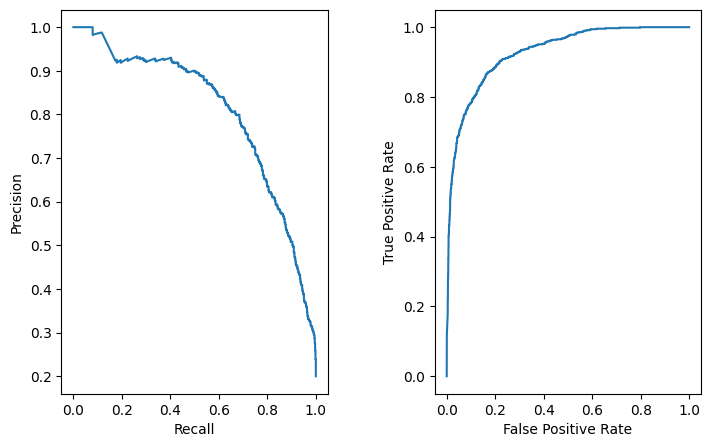

In [58]:
s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc = check_scores(svc,x_train, x_test, y_train, y_test)

In [59]:
#parameter adjusting using the gridsearchCV
parameters ={
    "C":[0.1,1,10],
    "kernel":['linear', 'rbf', 'sigmoid'],
    "gamma":['scale', 'auto']
}



svm_optimal = grid_search(svm.SVC(probability=True), parameters,x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   4.8s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   4.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.8s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   3.8s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   3.7s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   4.2s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   4.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   2.9s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   3.0s
[CV] END ..................C=0.1, gamma=auto, kernel=sigmoid; total time=   3.3s
[CV] END ..................C=0.1, gamma=auto, ke

Train confusion matrix is: 
[[6382   25]
 [   4 1667]]

Test confusion matrix is: 
[[2711   60]
 [ 306  386]]

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2771
           1       0.87      0.56      0.68       692

    accuracy                           0.89      3463
   macro avg       0.88      0.77      0.81      3463
weighted avg       0.89      0.89      0.89      3463


Train accuracy score:  0.9964100024758603
Test accuracy score:  0.8943112907883338

Train ROC-AUC score:  0.9984624648926681
Test ROC-AUC score:  0.9282277948946877

Are under Precision-Recall curve: 0.6783831282952548
Area under ROC-AUC: 0.81205761019596


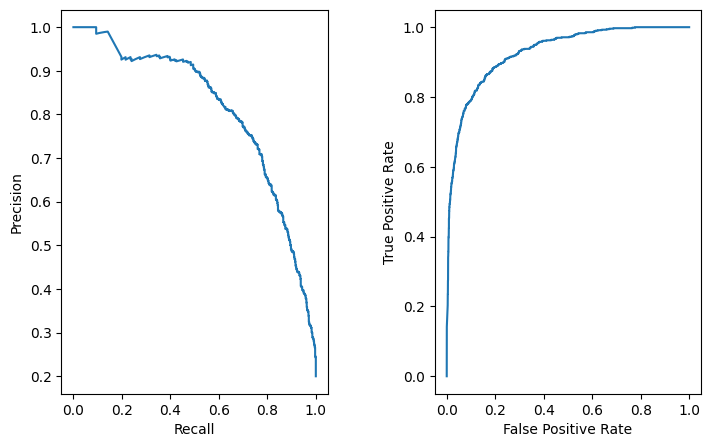

In [60]:
so_train_accuracy, so_test_accuracy, so_train_auc, so_test_auc = check_scores(svm_optimal,x_train, x_test, y_train, y_test)

In [73]:
from sklearn.naive_bayes import MultinomialNB ,GaussianNB ## trying the naive bayes algorithms

In [71]:
bayes = MultinomialNB()

Train confusion matrix is: 
[[6405    2]
 [1230  441]]

Test confusion matrix is: 
[[2769    2]
 [ 592  100]]

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2771
           1       0.98      0.14      0.25       692

    accuracy                           0.83      3463
   macro avg       0.90      0.57      0.58      3463
weighted avg       0.86      0.83      0.77      3463


Train accuracy score:  0.8474870017331022
Test accuracy score:  0.8284724227548369

Train ROC-AUC score:  0.9564426700038304
Test ROC-AUC score:  0.9016827359334814

Are under Precision-Recall curve: 0.2518891687657431
Area under ROC-AUC: 0.7442784894593476


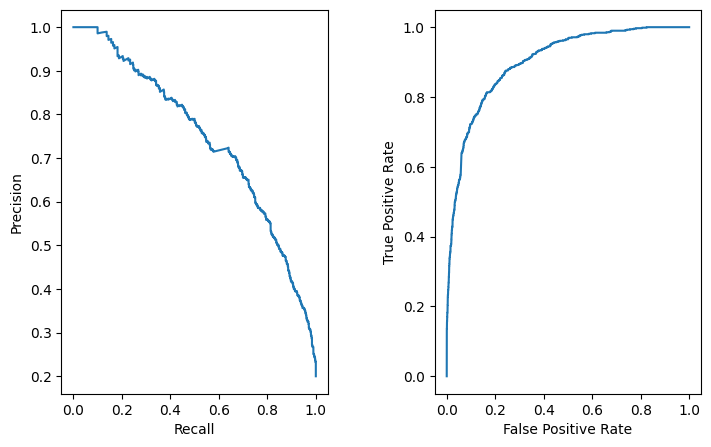

In [72]:
NB_trainscore,NB_tesscore,NB_trainAUC,NB_testAUC = check_scores(bayes,x_train, x_test, y_train, y_test)

Train confusion matrix is: 
[[5256 1151]
 [   0 1671]]

Test confusion matrix is: 
[[1973  798]
 [ 225  467]]

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      2771
           1       0.37      0.67      0.48       692

    accuracy                           0.70      3463
   macro avg       0.63      0.69      0.64      3463
weighted avg       0.79      0.70      0.73      3463


Train accuracy score:  0.8575142361970784
Test accuracy score:  0.7045913947444412

Train ROC-AUC score:  0.9101763695957547
Test ROC-AUC score:  0.6934364067979049

Are under Precision-Recall curve: 0.47726111394992327
Area under ROC-AUC: 0.5544990094710537


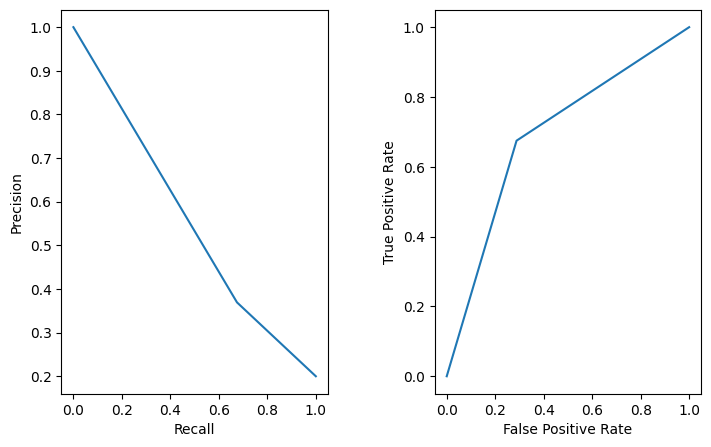

In [74]:
g_train_accuracy, g_test_accuracy, g_train_auc, g_test_auc=check_scores(GaussianNB(),x_train.toarray(), x_test.toarray(), y_train, y_test)

In [75]:
#using the ensemble algorithms to ckeck the result and score \
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier ## base weak learer for the ada boost

In [76]:
#Step 3: Choose a weak learner (base estimator)
base_estimator = DecisionTreeClassifier(max_depth=1)
# Step 4: Create an AdaBoost instance
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train confusion matrix is: 
[[6225  182]
 [ 936  735]]

Test confusion matrix is: 
[[2691   80]
 [ 414  278]]

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2771
           1       0.78      0.40      0.53       692

    accuracy                           0.86      3463
   macro avg       0.82      0.69      0.72      3463
weighted avg       0.85      0.86      0.84      3463


Train accuracy score:  0.8615994057935132
Test accuracy score:  0.8573491192607565

Train ROC-AUC score:  0.8653829682282909
Test ROC-AUC score:  0.8382397268989513

Are under Precision-Recall curve: 0.5295238095238096
Area under ROC-AUC: 0.6462447644664262


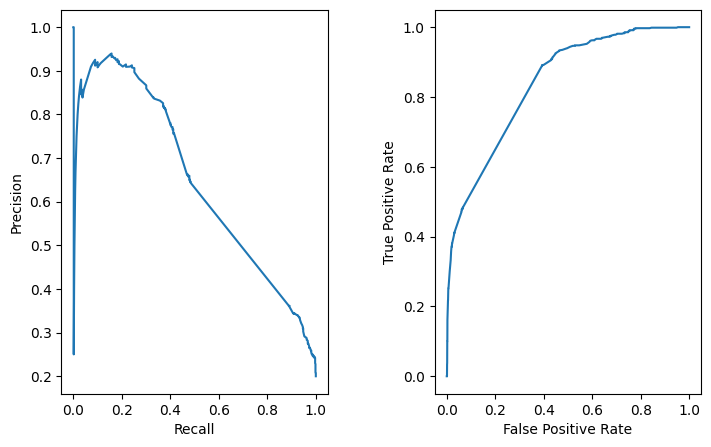

In [77]:
a_train_accuracy, a_test_accuracy, a_train_auc, a_test_auc=check_scores(adaboost,x_train,x_test, y_train, y_test)

Train confusion matrix is: 
[[6225  182]
 [ 936  735]]

Test confusion matrix is: 
[[2691   80]
 [ 414  278]]

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2771
           1       0.78      0.40      0.53       692

    accuracy                           0.86      3463
   macro avg       0.82      0.69      0.72      3463
weighted avg       0.85      0.86      0.84      3463


Train accuracy score:  0.8615994057935132
Test accuracy score:  0.8573491192607565

Train ROC-AUC score:  0.8653829682282909
Test ROC-AUC score:  0.8382397268989513

Are under Precision-Recall curve: 0.5295238095238096
Area under ROC-AUC: 0.6462447644664262


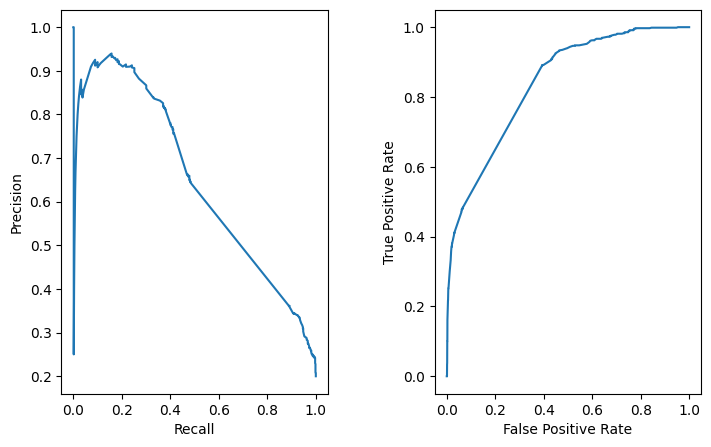

In [78]:
a_train_accuracy, a_test_accuracy, a_train_auc, a_test_auc=check_scores(AdaBoostClassifier(),x_train,x_test, y_train, y_test) # without the base learner


In [79]:
params = {'n_estimators': [10, 50, 100, 500],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'algorithm': ['SAMME', 'SAMME.R']}

ada_optimal_model = grid_search(AdaBoostClassifier(), params,x_train, y_train)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   0.2s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   2.2s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   1.1s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=100; total time=   2.8s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=100; total time=   2.2s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=500; total time=  10.0s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=500; total time=  10.0s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=10; total time=   0.2s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=10; total time=   0.2s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=50; total time=   1.0s
[CV] END algor

Train confusion matrix is: 
[[6315   92]
 [ 955  716]]

Test confusion matrix is: 
[[2720   51]
 [ 420  272]]

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2771
           1       0.84      0.39      0.54       692

    accuracy                           0.86      3463
   macro avg       0.85      0.69      0.73      3463
weighted avg       0.86      0.86      0.84      3463


Train accuracy score:  0.8703887100767517
Test accuracy score:  0.8639907594571181

Train ROC-AUC score:  0.9243626785746477
Test ROC-AUC score:  0.8795404718148119

Are under Precision-Recall curve: 0.535960591133005
Area under ROC-AUC: 0.7128547117220069


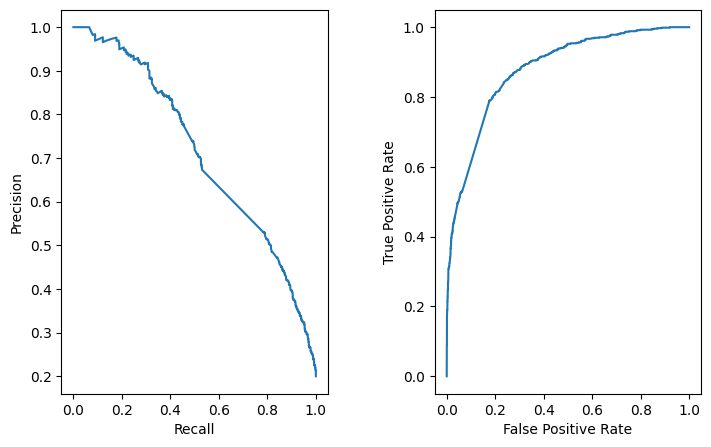

In [80]:
ao_train_accuracy, ao_test_accuracy, ao_train_auc, ao_test_auc=check_scores(ada_optimal_model,x_train,x_test, y_train, y_test)

In [81]:
## use the random forest medthod type of ensemble learning
from sklearn.ensemble import RandomForestClassifier

Train confusion matrix is: 
[[6381   26]
 [   4 1667]]

Test confusion matrix is: 
[[2649  122]
 [ 307  385]]

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2771
           1       0.76      0.56      0.64       692

    accuracy                           0.88      3463
   macro avg       0.83      0.76      0.78      3463
weighted avg       0.87      0.88      0.87      3463


Train accuracy score:  0.9962862094577866
Test accuracy score:  0.8761189719896044

Train ROC-AUC score:  0.9982699577633194
Test ROC-AUC score:  0.8956875295953338

Are under Precision-Recall curve: 0.6422018348623854
Area under ROC-AUC: 0.7378113304390189


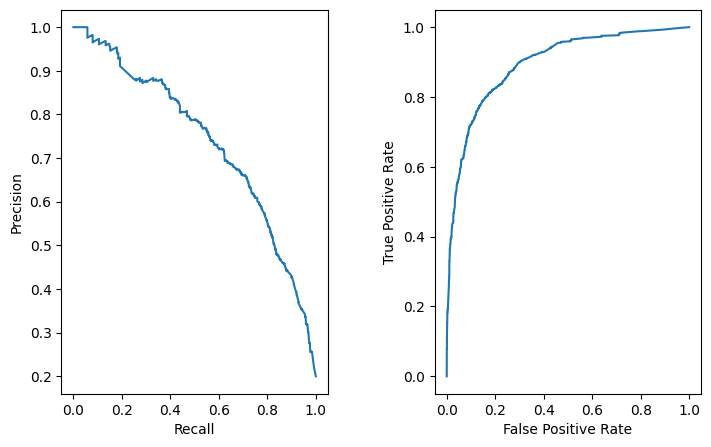

In [91]:
r_train_accuracy, r_test_accuracy, r_train_auc, r_test_auc= check_scores(RandomForestClassifier(random_state=0).fit(x_train, y_train), x_train,x_test,y_train,y_test)

In [86]:
#optimal random forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [ 5, 10],
    'min_samples_split': [2, 5, 10],

}

rand_optimal_model = grid_search(RandomForestClassifier(), param_grid,x_train, y_train)


Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END .max_depth=5, min_samples_split=5, n_es

Train confusion matrix is: 
[[6407    0]
 [1671    0]]

Test confusion matrix is: 
[[2771    0]
 [ 692    0]]

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2771
           1       0.00      0.00      0.00       692

    accuracy                           0.80      3463
   macro avg       0.40      0.50      0.44      3463
weighted avg       0.64      0.80      0.71      3463


Train accuracy score:  0.7931418667987126
Test accuracy score:  0.8001732601790356



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train ROC-AUC score:  0.9417068610530989
Test ROC-AUC score:  0.8836540928652038

Are under Precision-Recall curve: 0.0
Area under ROC-AUC: 0.7181035758407855


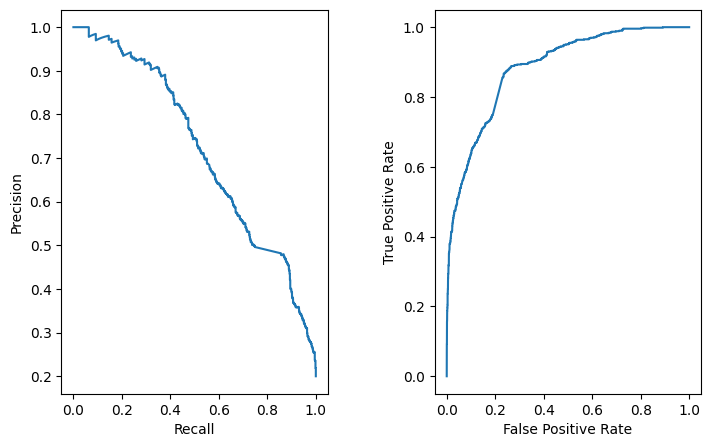

In [89]:
ro_train_accuracy, ro_test_accuracy, ro_train_auc, ro_test_auc= check_scores(rand_optimal_model.fit(x_train,y_train), x_train,x_test,y_train,y_test)

In [92]:
## collection of scores
data = [('Random Forest', r_train_accuracy, r_test_accuracy, r_train_auc, r_test_auc),
 ('MultinomialNB',NB_trainscore,NB_tesscore,NB_trainAUC,NB_testAUC),
 ('AdaBoost',a_train_accuracy, a_test_accuracy, a_train_auc, a_test_auc ),
('AdaBoost Optimized',ao_train_accuracy, ao_test_accuracy, ao_train_auc, ao_test_auc),
('Gaussian Naive Bayes',g_train_accuracy, g_test_accuracy, g_train_auc, g_test_auc),
('SVM', s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc),
('SVM Optimized', so_train_accuracy, so_test_accuracy, so_train_auc, so_test_auc),
('RandomForest Optimized', ro_train_accuracy, ro_test_accuracy, ro_train_auc, ro_test_auc),

]


Scores_ =pd.DataFrame(data = data, columns=['Model Name','Train Accuracy', 'Test Accuracy', 'Train ROC', 'Test ROC'])
Scores_.set_index('Model Name', inplace = True)

Scores_

,Train Accuracy,Test Accuracy,Train ROC,Test ROC
Model Name,,,,
Random Forest,0.996286,0.876119,0.998270,0.895688
MultinomialNB,0.847487,0.828472,0.956443,0.901683
AdaBoost,0.861599,0.857349,0.865383,0.838240
AdaBoost Optimized,0.870389,0.863991,0.924363,0.879540
Gaussian Naive Bayes,0.857514,0.704591,0.910176,0.693436
SVM,0.978708,0.883049,0.996818,0.928036
SVM Optimized,0.996410,0.894311,0.998462,0.928228
RandomForest Optimized,0.793142,0.800173,0.941707,0.883654


In [93]:
Scores_['Test Accuracy'].sort_values(ascending=False) ## well working all algorithms

Model Name
SVM Optimized             0.894311
SVM                       0.883049
Random Forest             0.876119
AdaBoost Optimized        0.863991
AdaBoost                  0.857349
MultinomialNB             0.828472
RandomForest Optimized    0.800173
Gaussian Naive Bayes      0.704591
Name: Test Accuracy, dtype: float64